In [223]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [224]:
data_path = '..\data\interim\dataset_2017_2018[Preprocess].csv'
df_data_2017_2018 = pd.read_csv(data_path)
data_path = '..\data\external\dados_cetesb_2020.csv'
df_data_2020 = pd.read_csv(data_path)
df_data = pd.concat([df_data_2017_2018,df_data_2020])
df_data_2020.sample(5)

,ts,Temperatura,Umidade
1787,2020-03-15 11:00:00,30.1,51.0
2179,2020-03-31 19:00:00,27.4,56.0
2195,2020-04-01 11:00:00,26.7,46.0
3624,2020-05-31 00:00:00,12.8,68.0
1540,2020-03-05 04:00:00,18.2,79.0


In [225]:
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')
df_data.describe()

,Temperatura,Umidade
count,21168.000000,21168.000000
mean,21.928538,65.733808
std,4.771493,18.521315
min,7.113333,6.843167
25%,18.655536,52.319684
50%,21.485833,69.522500
75%,25.313750,80.016667
max,36.000000,100.000000


<IPython.core.display.Javascript object>


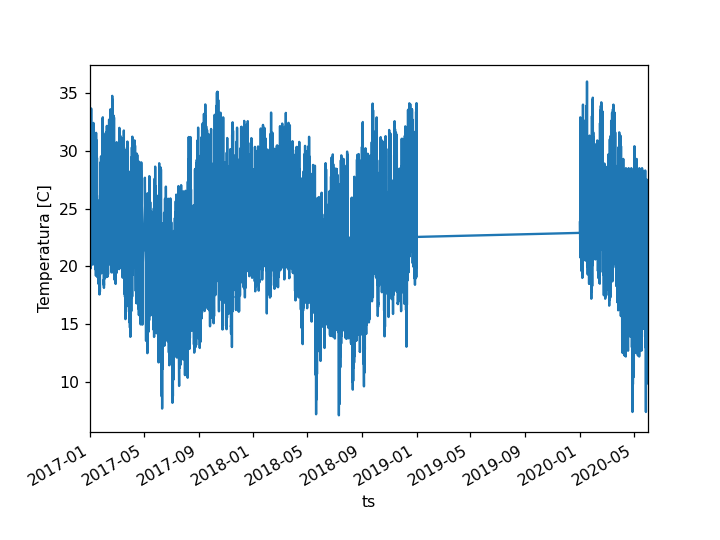

Text(0, 0.5, 'Temperatura [C]')

In [226]:
df_data['Temperatura'].plot()
plt.ylabel('Temperatura [C]')

In [227]:
def get_humidex(T,H):
    z = 6.112*(10**((7.5*T)/(237.7+T)))*(H/100)
    return T+((5/9)*(z-10))

df_data['Humidex'] = get_humidex(df_data['Temperatura'].values,df_data['Umidade'].values)
df_data

,Temperatura,Umidade,Humidex
ts,,,
2017-01-01 00:00:00,21.458000,86.760000,28.211429
2017-01-01 01:00:00,21.828333,83.500000,28.390057
2017-01-01 02:00:00,21.281667,87.716667,28.037330
2017-01-01 03:00:00,20.755000,91.250000,27.599527
2017-01-01 04:00:00,20.731667,90.300000,27.429513
...,...,...,...
2020-05-31 19:00:00,19.800000,36.000000,18.856689
2020-05-31 20:00:00,16.700000,47.000000,16.102868
2020-05-31 21:00:00,15.100000,54.000000,14.688281


<IPython.core.display.Javascript object>


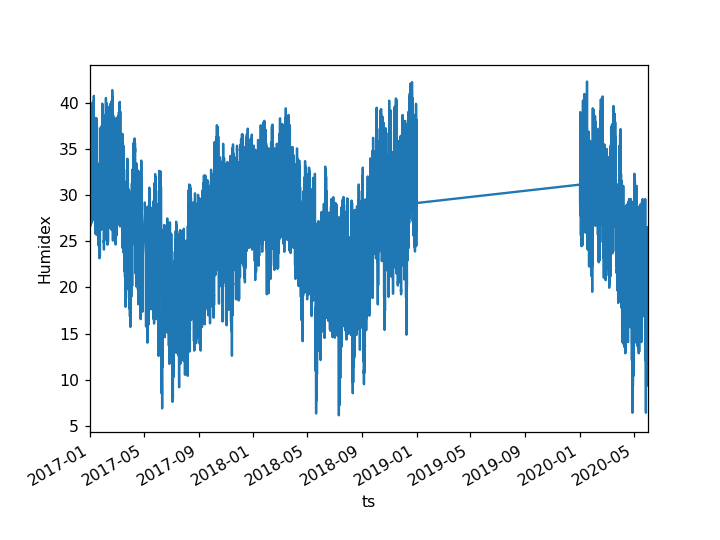

Text(0, 0.5, 'Humidex')

In [228]:
df_data['Humidex'].plot()
plt.ylabel('Humidex')

In [229]:
nivel = []
humidex_values = df_data['Humidex'].values
for h in humidex_values:
    if h<=29: 
        nivel.append('comfortable')
    elif h<=39: 
        nivel.append('some discomfort')
    elif h<=45: 
        nivel.append('great discomfort')
    else: 
        nivel.append('dangerous')
df_data['Nivel'] = nivel

In [230]:
df_data.groupby('Nivel')['Humidex'].count()

Nivel
comfortable         14717
great discomfort      199
some discomfort      6252
Name: Humidex, dtype: int64

In [231]:
df_data.to_csv('..\data\processed\\time_series[Transformation].csv',index_label='ts')

In [232]:
df_H = df_data[['Humidex']].copy()
df_H['interval'] = df_H.index.time
df_H.index = df_H.index.date
df_pivot_H = df_H.pivot(columns='interval')
df_pivot_H = df_pivot_H.dropna()

In [233]:
df_pivot_H.sample(5)

Humidex                                                         \
interval     00:00:00   01:00:00   02:00:00   03:00:00   04:00:00   05:00:00   
2020-01-28  27.128206  22.913722  22.347747  21.483473  20.751073  20.128901   
2018-06-19  19.243823  19.172376  18.818784  18.578920  18.303049  18.152534   
2018-05-04  22.727299  22.466121  22.097689  21.252167  19.895664  19.552515   
2017-04-29  23.405705  23.454723  23.503677  23.552567  23.601393  23.650153   
2018-04-25  23.300946  22.733497  22.171824  21.632159  21.015629  20.236787   

                                                        ...             \
interval     06:00:00   07:00:00   08:00:00   09:00:00  ...   14:00:00   
2020-01-28  19.512620  20.107117  22.611110  27.433309  ...  34.657060   
2018-06-19  17.945083  18.215164  20.577047  22.991374  ...  28.100565   
2018-05-04  19.218272  20.830591  24.223365  27.510243  ...  31.457298   
2017-04-29  23.698848  23.747477  23.796040  23.844537  ...  24.086012   
2018-04-25  20.406963  22.545599  26.385570  28.758756  ...  31.571056   

                                                                              \
interval     15:00:00   16:00:00   17:00:00   18:00:00   19:00:00   20:00:00   
2020-01-28  35.474457  35.775821  35.337786  34.264111  32.329520  30.105686   
2018-06-19  28.044319  27.428595  26.017238  23.806078  23.062748  22.849241   
2018-05-04  31.659816  30.897888  29.628784  26.717816  25.614029  25.322730   
2017-04-29  24.134103  24.182125  24.230078  24.277961  24.325775  24.373518   
2018-04-25  31.931341  31.953025  30.772618  29.234791  28.140895  26.552523   

                                             
interval     21:00:00   22:00:00   23:00:00  
2020-01-28  29.414353  28.681935  27.969741  
2018-06-19  22.046956  21.227216  20.353811  
2018-05-04  24.710545  24.187470  23.968944  
2017-04-29  24.421190  24.468791  24.516321  
2018-04-25  26.206553  25.852857  25.136486  

[5 rows x 24 columns]

In [234]:
df_pivot_H['Humidex'].to_csv('..\data\processed\\time_series[Transformation].csv',index_label='ts')

<IPython.core.display.Javascript object>


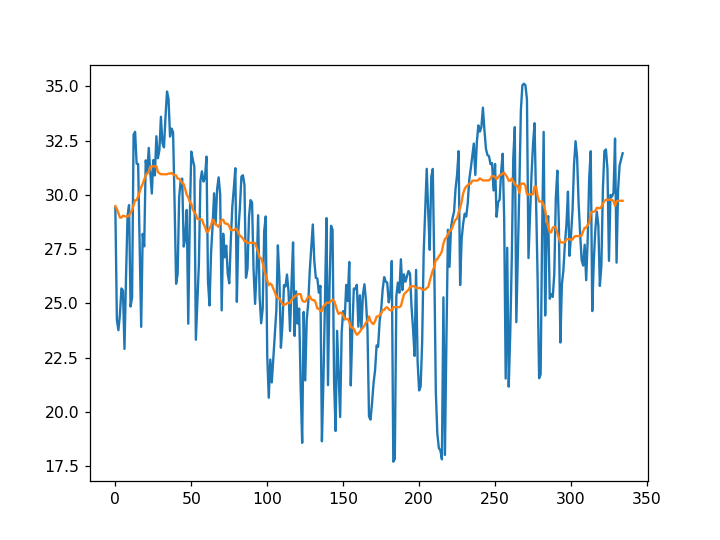

In [252]:
df_T = df_data[['Temperatura']].copy()
df_T['interval'] = df_T.index.time
df_T.index = df_T.index.date
df_pivot_T = df_T.pivot(columns='interval')
df_pivot_T = df_pivot_T.dropna()

df_hw = df_pivot_T.copy()
df_hw.index = pd.to_datetime(df_hw.index)
df_hw = df_hw[df_hw.index.year==2017]


jdate = '2017-01-16'
fmt = '%Y-%m-%d'
day = datetime.datetime.strptime(jdate, fmt).date()

heat_wave = []
P_90s = []
Tmax = []
for i in range(335):
    max_date_limit = day + datetime.timedelta(days=15)
    min_date_limit = day - datetime.timedelta(days=15)
    #print(max_date_limit,'- [',day,'] -',min_date_limit)
    dates = pd.date_range(min_date_limit,max_date_limit,freq='D')
    temperaturas = []
    for d in dates:
        temperaturas.append(df_hw.loc[d].ravel())
    temperaturas = np.array(temperaturas).ravel()
    max_P90 = np.quantile(temperaturas,.9)
    #print('P90 = ',max_P90)
    cant = (df_hw.loc[day].ravel() > max_P90).sum()
    if cant>0:
        heat_wave.append(True)
    else:
        heat_wave.append(False)
    P_90s.append(max_P90)
    Tmax.append(df_hw.loc[day].ravel().max())
    #print(df_hw.loc[day].ravel())
    day = day + datetime.timedelta(days=1)
#plt.scatter(np.arange(335),np.array(Tmax))
plt.plot(np.array(Tmax))
plt.plot(np.array(P_90s))




In [253]:
df = {'Tmax':Tmax,'P90':P_90s}
df = pd.DataFrame(data = df)
df.to_csv('temp2.csv')

In [254]:
cont = 0
olas = 0
for i in range(len(heat_wave)):
    if heat_wave[i]:
        cont+=1
    else:
        if cont > 4:
            print('Heat wave days: ',cont,'Dia Juliano: ',i+16)
            jdate = str(2018)+'-'+str(i+16)
            fmt = '%Y-%j'
            print(datetime.datetime.strptime(jdate, fmt))
            olas+=1
        cont = 0
print('Heat waves: ',olas)

Heat wave days:  12 Dia Juliano:  55
2018-02-24 00:00:00
Heat wave days:  5 Dia Juliano:  77
2018-03-18 00:00:00
Heat wave days:  5 Dia Juliano:  86
2018-03-27 00:00:00
Heat wave days:  5 Dia Juliano:  102
2018-04-12 00:00:00
Heat wave days:  8 Dia Juliano:  152
2018-06-01 00:00:00
Heat wave days:  9 Dia Juliano:  182
2018-07-01 00:00:00
Heat wave days:  8 Dia Juliano:  199
2018-07-18 00:00:00
Heat wave days:  10 Dia Juliano:  211
2018-07-30 00:00:00
Heat wave days:  7 Dia Juliano:  226
2018-08-14 00:00:00
Heat wave days:  6 Dia Juliano:  243
2018-08-31 00:00:00
Heat wave days:  16 Dia Juliano:  265
2018-09-22 00:00:00
Heat wave days:  6 Dia Juliano:  288
2018-10-15 00:00:00
Heat wave days:  7 Dia Juliano:  323
2018-11-19 00:00:00
Heat waves:  13
